In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np


nodes = [i+1 for i in range(5)]
edges  = [(i,i+1) for i in range(5)]
edges

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

In [4]:
G =nx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)
G.add_node(100)
adj_mat  = nx.to_numpy_matrix(G)
adj_mat.shape

(7, 7)

In [5]:
adj_list  = nx.to_dict_of_lists(G)
adj_list

{0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5: [], 100: []}

In [6]:
g = np.array([
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0]
])
g

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

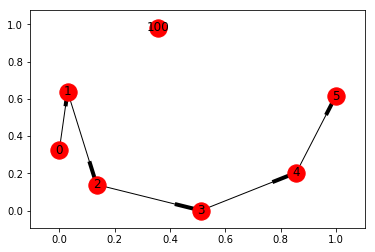

In [7]:
pos = nx.spring_layout(G)

nx.draw_networkx(G,pos,with_labels=True)
#plt.axis("off")
plt.show()

## 0,1を要素とする対角行列の生成

In [8]:
a = np.zeros((5,5),int)
np.fill_diagonal(a,5)
a

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]])

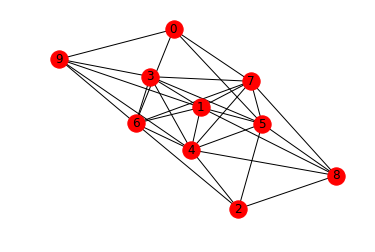

In [9]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
N=10 

mat = np.random.randint(0,2,(N,N))
mat_symm= np.triu(mat,k=1) + np.triu(mat.T,k=1).T

gene = []
def create_gene(array):
    for i in range(N):
        tmp = array[i,i+1:]
        gene.extend(tmp)
    return gene

#create Graph based on gene
nodes = [i for i in range(N)]
G = nx.from_numpy_matrix(mat_symm)
G.add_nodes_from(nodes)
nx.draw_networkx(G,with_labels=True)
plt.axis("off")
plt.show()

[1]

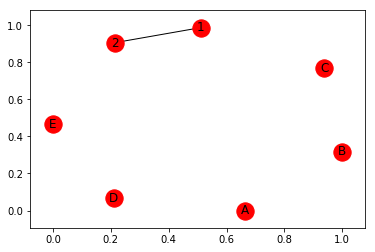

In [10]:
a=nx.Graph()
a.add_nodes_from("ABCDE")
a.add_edges_from([(1,2)])
nx.draw_networkx(a)
a.number_of_nodes()
a.neighbors(2)

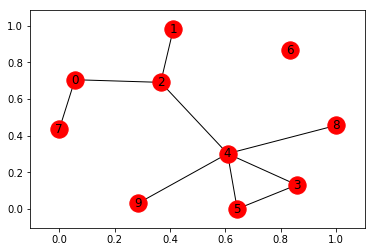

In [11]:
matrix = np.random.binomial(1,0.1,size=[10,10])
mat_symm= np.triu(matrix,k=1) + np.triu(matrix.T,k=1).T
G = nx.from_numpy_matrix(mat_symm)
nx.draw_networkx(G)

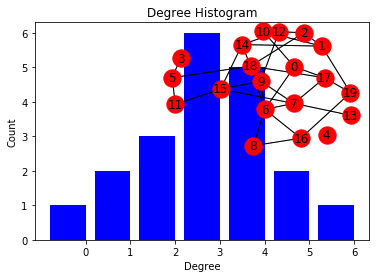

hub:[6, 7, 18]
sub [4]
isolates [4]
{0: [6, 1], 1: [18, 2], 2: [18, 1], 3: [18, 2], 4: [4, 0], 5: [18, 1], 6: [6, 0], 7: [7, 0], 8: [6, 1], 9: [6, 1], 10: [6, 2], 11: [7, 2], 12: [6, 2], 13: [7, 1], 14: [18, 1], 15: [7, 1], 16: [6, 1], 17: [7, 1], 18: [18, 0], 19: [6, 2]}


TypeError: 'dict_values' object does not support indexing

In [13]:
import collections
N=20

G = nx.gnp_random_graph(N, 0.15)
degree_sequence = sorted([d for n, d in G.degree().items()])
degreeCount = collections.Counter(degree_sequence)
deg ,cnt  =zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg,cnt,width=0.8,color = "b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx(G,pos,with_labels=True)
plt.show()

#calculate path lenght to the nearest influencer and inflencer node. 
par = 0.7 # upper 100*(1-par)%  
hub = [n for n, d in G.degree().items() if d>max(degreeCount.keys())*par]
print("hub:{}".format(hub))
store = [] # [influencer node, path length to influencer]
isolates = nx.isolates(G)
l1 = []
l2 = []
# find nodes which have no path to hub. 
sub=[]
for n in range(N):
    ns = nx.node_connected_component(G,n)
    if not ns & set(hub):sub.append(n)    
print ("sub",sub)
print("isolates",isolates)
kk = []
for n in G.degree().keys():
    if n in hub or n in isolates or n in sub:
        store.append([n,0])
    else:
        for x in hub:
            kk.append(nx.shortest_path_length(G,n,x))
        mi = min(kk)
        store.append([hub[kk.index(mi)],mi])
        kk.clear()
num = [i for i in range(N)]
di = dict(zip(num,store)) # di = {node num:[nearest influencer, path length to nearest influencer]}
print(di)
print(di.values()[1])

In [29]:
leng = [list(di.values())[i][1] for i in range(len(di))]
leng

[1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2]

In [23]:
a = [[2,3],[1,4]]
b = [a[i][1] for i in range(len(a))]
a[0]

[2, 3]

#### 次数が上位10％以上のノード番号を抽出

In [ ]:
max(degreeCount)
hub = [n for n, d in G.degree().items() if d>max(degreeCount.keys())*0.8]
print (hub)

In [ ]:
a = [0,3]
d = {0:1,1:4,2:8}
s = dict()
s.update("1" :1)
s.update("2":2)
s
# for n,d in d.items():
#     if n in a:
#         s.update(n=0)
#     else:
#         for i in a:
#             t = n-i
#             s.update(n=t)


In [ ]:
N=8
G = nx.gnp_random_graph(N, 0.15)
nx.draw_networkx(G)
hub = [n for n, d in G.degree().items() if d>max(degreeCount.keys())*0.7]
print(hub)
# for n in range(N):
#     if hub in list(nx.node_connected_component(G,n)):
#         print (n)
list(nx.node_connected_component(G,1))

In [ ]:

a = []
for i in hub:
    tmp1 = nx.shortest_path_length(G,1,i)
    tmp = [1,tmp1]
    a.append(tmp)
a

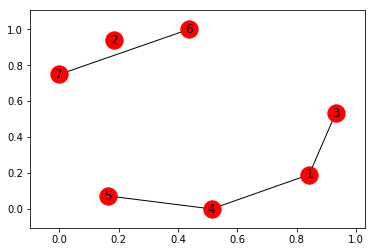

In [24]:
a = nx.Graph()
a.add_nodes_from([1,2,3,4,5,6,7])
a.add_edges_from([(1,3),(1,4),(4,5),(6,7)])
nx.draw_networkx(a)

In [35]:
hub =[1,4]
mi = min(hub, key=lambda x: nx.shortest_path_length(a,4,x))
mi

4

In [34]:
for i in hub:
    print(i)
    print(nx.shortest_path_length(a,4,i))

1
1
4
0
